# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

# Práctica de Matemáticas 101 - Álgebra - Guillermo Barrio

*Esta es la práctica resulta por mí. He mantenido los enunciados originales, mientras que mis comentarios estan escritos en cursiva, para evitar confusiones*

*La estructura de la práctica es la misma que la propuesta, con el añadido de un breve capítulo final, en el que resolvemos la correlación entre consumo y peso de automóbiles, con una columna adicional: el cuadrado del peso.*

*Por otro lado, hemos añadido en el primer capítulo un pequeño análisis exploratorio.*

*En el capítulo de descenso de gradiente hemos aplicado la definición de los ajustes de los coeficientes mediante el cálculo de las derivadas parciales respectivas. La razón es que inicialmente, sin ver el enunciado completo de la práctica, pensé en como resolverla, y decidí resolverla con las derivadas parciales; ya que funcionó, decidí dejarla así. Explico con cierto detalle el procedimiento que he seguido.*


## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

*Importo pandas como pd, por si hiciese falta utilizar algunos comandos de ella por el pd. por delante. Y hacemos lo mismo con numpy.*

In [2]:
import numpy as np

import pandas as pd

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

*Hago un 'describe'. Parece un dataset bastante limpio, con casi todas las columnas completas, y sin que haya apenas outliers. Las columnas 'model_year' y 'origin' son realmente discretas, pero no habría gran problema para utilizarlas.*

In [5]:
X.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


*Tampoco hay nada raro en la columna Target. Solo reseñar que el consumos en EEUU se mide en millas por galón, por lo que un mayor consumo implica una MENOR cantidad de mpg, al contrario de lo que ocurre tal y como lo describimos en España. Este matiz hay que tenerlo en cuenta para evitar confusiones.*

In [6]:
y.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

*He hecho la función 'visualiza' que crea un gráfico de puntos de color rojo entre la columna mpg y la que elijamos. Se muestran tres gráficos como ejemplo. En el primero y tercero queda claro la correlación entre más potencia y peso, y mayor consumo. Más curioso es el segundo, donde parecería que, a más aceleración, menos consumo; quizás se deba a que los coches pequeños y de menos peso aceleran más rápido pero consumen menos.*

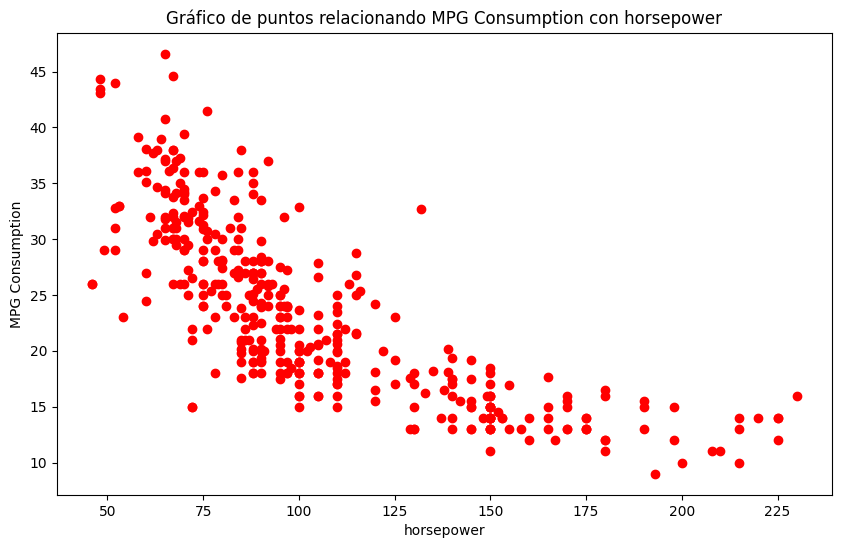

In [7]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[nombre_columna], y, color = 'r')
    plt.xlabel(nombre_columna)
    plt.ylabel('MPG Consumption')
    plt.title(f"Gráfico de puntos relacionando MPG Consumption con {nombre_columna}")
    plt.show()

visualiza(X, y, 'horsepower')

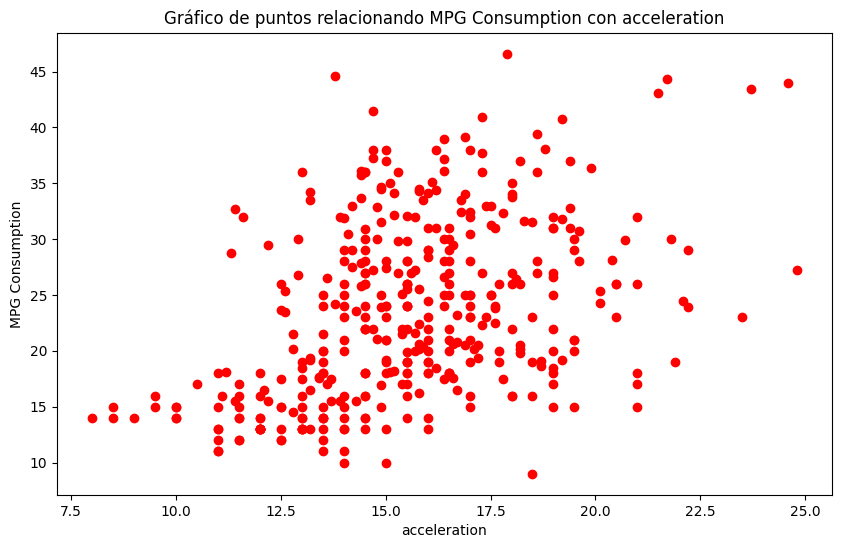

In [8]:
visualiza(X, y, 'acceleration')

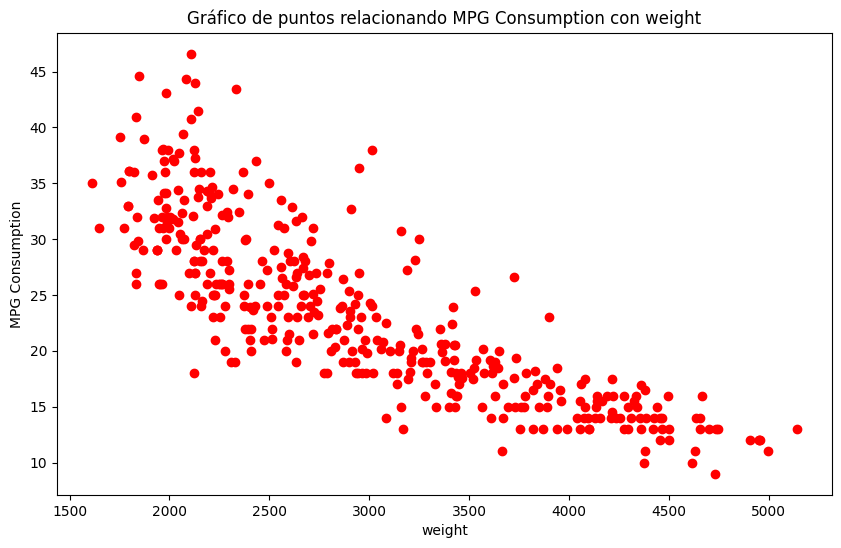

In [9]:
visualiza(X, y, 'weight')

*Podemos ver que hay una relación lineal descendente entre el peso y el mpg. O casi, porque al ser dos cantidades definidas positivas, el mpg se aplana a medida que el peso aumenta. La relación entre ambas variables se parecería más bien a una parábola de eje vertical.*

*Podemos comprobar las correlaciones entre variables, incluyendo aquí tanto la target (mpg) como el resto de columnas. Hacemos pues una copia al dataframe X y añadimos la y, lamando al DF resultante X_completo.*

In [10]:
X_completo = X.copy()

In [11]:
X_completo['MPG'] = y

In [12]:
X_completo.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,MPG
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


*Calculamos la matriz de correlaciones a través de pandas. Lo cierto es que todas las columnas presentan una gran correlación con la de mpg, solo con la excepción quizás de 'acceleration'. La más alta es precisamente la de 'weight' con un 0.83, lo cual es difícil de mejorar, a menos que, en principio, pongamos una columna adicional para darle el efecto de relación parabólica.'*

In [13]:
correlation_matrix = X_completo.corr()
print(correlation_matrix)

              displacement  cylinders  horsepower    weight  acceleration  \
displacement      1.000000   0.950721    0.897257  0.932824     -0.543684   
cylinders         0.950721   1.000000    0.842983  0.896017     -0.505419   
horsepower        0.897257   0.842983    1.000000  0.864538     -0.689196   
weight            0.932824   0.896017    0.864538  1.000000     -0.417457   
acceleration     -0.543684  -0.505419   -0.689196 -0.417457      1.000000   
model_year       -0.370164  -0.348746   -0.416361 -0.306564      0.288137   
origin           -0.609409  -0.562543   -0.455171 -0.581024      0.205873   
MPG              -0.804203  -0.775396   -0.778427 -0.831741      0.420289   

              model_year    origin       MPG  
displacement   -0.370164 -0.609409 -0.804203  
cylinders      -0.348746 -0.562543 -0.775396  
horsepower     -0.416361 -0.455171 -0.778427  
weight         -0.306564 -0.581024 -0.831741  
acceleration    0.288137  0.205873  0.420289  
model_year      1.000000

*para cuando añadamos esta columna (peso al cuadrado) la podemos añadir ya al DF X_completo. Pero anteriormente dividimos la columna de peso por 1.000 para que su cuadrado no tenga una magnitud tan alta.*

In [14]:
X_completo['weight'] = X_completo['weight'] / 1000

In [15]:
X_completo['weight_2'] = X_completo['weight'] ** 2

In [16]:
X_completo.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,MPG,weight_2
0,307.0,8,130.0,3.504,12.0,70,1,18.0,12.278016
1,350.0,8,165.0,3.693,11.5,70,1,15.0,13.638249
2,318.0,8,150.0,3.436,11.0,70,1,18.0,11.806096
3,304.0,8,150.0,3.433,12.0,70,1,16.0,11.785489
4,302.0,8,140.0,3.449,10.5,70,1,17.0,11.895601


IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

*Revisamos la dimensión de la DF X.*

In [17]:
X.shape

(398, 7)

*A continuación, completamos la función pesos_ols siguiendo los pasos dados y lo que se puede encontrar en cuadernos de clase.*

In [18]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial


    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[1] > X.shape[0]:
        X = X.T

    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula

    ones = np.ones((X.shape[0],1))
    X_b = np.hstack((ones, X))

    # TODO 3 Calcula los pesos

    w = np.linalg.inv((X_b.T@ X_b)) @ X_b.T @ y

    return w

*Probamos el array de prueba y la función da el resultado correcto.*

In [19]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

*Implementamos el modelo de consunmo de coches en función de su peso. Efectivamente, hay que tener cuidado con las dimensiones de los arrays en numpy.*

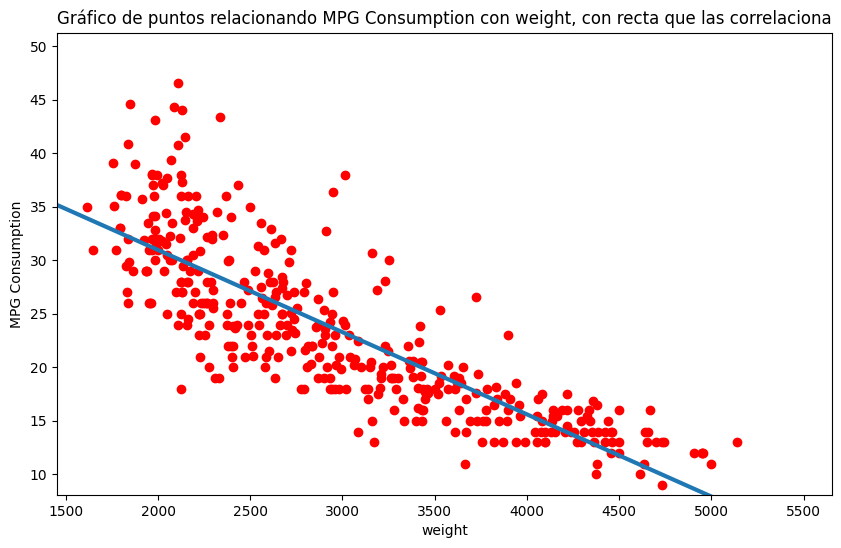

In [21]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features['weight']
y = auto_mpg.data.targets

# Transformamos los dataframes to numpy, adaptando las dimensiones de X para que se pueda enviar a pesos_ols
X = X.to_numpy()
X = X.reshape(X.shape[0], 1)
y = y.to_numpy()

# Obtenemos los pesos del modelo, y hacemos un reshape para leerlos de forma más cómoda
pesos = pesos_ols(X, y).reshape(2,)

#  Identificamos los pesos como punto de corte el primero y pendiente el segundo
punto_corte = pesos[0]
pendiente = pesos[1]

# Definimos las x e y de la recta que buscamos con el modelo
x_plot = np.array([0, -punto_corte / pendiente])
y_plot = np.array([punto_corte, 0])

# Pintamos los puntos y la recta, con un grosor de 3. Sale por defecto de color azul
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'r')
plt.xlabel('weight')
plt.ylabel('MPG Consumption')
plt.title(f"Gráfico de puntos relacionando MPG Consumption con weight, con recta que las correlaciona")

# Esta es la recta, que dibujamos con la funcion plt.plot
plt.plot(x_plot, y_plot, lw = 3)
plt.xlim(min(X)*0.9, max(X)*1.1)
plt.ylim(min(y)*0.9, max(y)*1.1)
plt.show()



*Lo cierto es que queda bastante bien, aunque parecería que los outliers, por llamarlos así, con un mpg relativamente alto, tiende a 'elevar' la recta.*

*Podemos ver los coeficientes. Lo cierto es que el término independiente es 46,32 y la pendiente es de -0,00768. El hecho de que la relación entre ellos sea de 1:6.000 me temo que puede crear bastantes problemas cuando apliquemos el descenso de gradiente.*  

In [22]:
pesos

array([ 4.63173644e+01, -7.67661006e-03])

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

*Aplicamos el modelo de LinearRegression de SKlearn, que está basado en scipy.linalg.lstsq. Lo cierto es que, como cabía esperar, el resultado es el mismo, ya que el método utilizado es completamente determinista.*

In [23]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features
y = auto_mpg.data.targets

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



*El método de los mínimos cuadrados minimiza el error cuadrático medio de una forma determinista, y digamos que exacta: aplica una fórmula matricial deducida mediante análisis. El problema que presenta es que para una gran cantidad de observaciones y de variables a determinar, el esfuerzo de invertir matrices puede ser demasiado costoso. Como alternativa tenemos el descenso de gradiente, que no deja de ser un método de aproximaciones sucesivas, menos exigente computacionalmente, pero con el inconveniente de que no es determinista, puede determinar solo mínimos locales, o puede simplemente no converger en absoluto dependiendo por ejemplo del punto de partida que tomemos.*

*A continuación pasamos a la optimización con descenso de gradiente. Como he mencionado, lo he implementado de forma algo diferente, pues he calculado el gradiente a partir de las derivadas parciales del RSS respecto a los pesos, y, por lo tanto, no he utilizado la ecuación matricial dada en la celda siguiente.*

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

*En conjunto, he definido tres funciones:*

- Cálculo del RSS
- Cálculo de las derivadas parciales del RSS respecto a los pesos
- Implementación del descenso de gradientes propiamente dicho

*Para estas dos últimas funciones he definido inicialmente la versión aplicable a dos dimensiones, como es explícitamente el problema que tenemos, pasando a continuación a definirlas para n dimensiones.*

*El primer paso que hemos efectuado, de todas formas, es la estadarización de la columna del peso de los coches, algo que se hace en el enunciado de la práctica también.*

*Este proceso es obligatorio antes de implementar muchos modelos, desde luego todos aquellos donde intervenga la distancia entre puntos, es decir, entre filas del dataframe. En el resto, que incluyen la regresión lineal, no influye en teoría, pero es conveniente hacerlo.*

*Mi experiencia personal es que, al menos en la regresión logística, es bastante conveniente, en especial si las columnas tienen distintos órdenes de magnitud.*

*Lo cierto es que intenté calcular el descenso de gradiente con el dataframe X sin estandarizar, y me fue imposible que convegiese.*

In [24]:
X = auto_mpg.data.features['weight']
y = auto_mpg.data.targets

X = X.to_numpy()
X = X.reshape(X.shape[0], 1)

X_gd = (X - X.mean()) / X.std()

y = y.to_numpy()

*Para tomar como referencia, podemos calcular los coeficientes ya con X estandarizada mediante SKlearn. Como cabia esperar, su orden de magnitud es mucho más parejo que anteriormente.*

In [25]:
lr.fit(X_gd,y)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [23.51457286]
Pendiente: [[-6.49270202]]


*Definimos a continuación la funcion de cálculo del RSS, que no tiene mayor misterio: se le introducen el vector de coeficientes w, el array X y el array y, se calcula el RSS tras añadir una columna de 1s a X y hacer el producto matricial.*

In [26]:
def calculo_rss(w, X, y):
    ones = np.ones((X.shape[0],1))
    X_b = np.hstack((ones, X))
    rss = 0.5 * sum((y - X_b @ w) ** 2)

    return rss.reshape(1,)[0]

*Probamos el cálculo del RSS, primero con unas w tomadas casi al azar, y con los coeficientes que hemos obtenido anteriormente, que son los que dan un RSS mínimo.*

In [27]:
calculo_rss(np.array([450, -0.00001]).reshape(2,1), X_gd, y)

36208200.35415906

In [28]:
calculo_rss(np.array([23.51, -6.49]).reshape(2,1), X_gd, y)

3737.4126213819673

*Ahora vamos con la función derivada_rss, que calcula las derivadas parciales de RSS respecto a los pesos en w, en este caso para dos dimensiones, w0 y w1. La derivada la calculamos sugún la definición original también: cociente de la variación de la función en función de una variación de la variable independiente, entre la variación de la variable independiente.*

*Por supuesto, para el cálculo de la derivada de RSS utilizamos repetidamente la función de cálculo del RSS, que hemos definido con anterioridad.*

In [29]:
def derivada_rss(w, X, y):

    # Tomamos k como el incremento proporcional de la variable independiente pata calcular la derivada
    k = 0.0000001

    # Valor inicial de RSS que tomamos como base para calcular las derivadas parciales
    rss_inicial = calculo_rss(w, X, y)

    # Desempaquetamos los dos coeficientes
    w0 = w.reshape(2, )[0]
    w1 = w.reshape(2, )[1]

    # Calculamos el vector w modificado con los incrementos de los dos coeficientes
    w_inc_w0 = w + np.array([w0 * k, 0]).reshape(2,1)
    w_inc_w1 = w + np.array([0, w1 * k]).reshape(2,1)

    # Calculamos sendas derivadas parciales
    d_rss_dw0 = (calculo_rss(w_inc_w0, X, y) - rss_inicial) / (w0 * k)
    d_rss_dw1 = (calculo_rss(w_inc_w1, X, y) - rss_inicial) / (w1 * k)

    # Devolvemos las derivadas parciales con el formato para ser sumadas fácilmente en el descenso de gradientes
    return np.array([d_rss_dw0, d_rss_dw1]).reshape(2,1)


*Calculamos las derivadas en un punto cualquiera y en el que hace el RSS mínimo, que muestra un dato muy pequeño, casi cero, lo cual era lo esperable.*

In [30]:
derivada_rss(np.array([450, -0.00001]).reshape(2,1), X_gd, y)

array([[169741.20951361],
       [  7450.58059692]])

In [31]:
derivada_rss(np.array([23.5146, -6.4927]).reshape(2,1), X_gd, y)

array([[0.01126706],
       [0.00067799]])

*Finalmente, definimos nuestra función de descenso de gradiente. Introducimos un vector de pesos inicial w, así como los arrays X e y, así como el learning rate eta. Además, se define una tolerancia tol, que detiene el descenso de gradiente cuando las magnitudes de w y el producto eta x derivada tengan una relación a tol, aunque no hayamos llegado a la última iteración.*

In [32]:
def descenso_gradiente(w, X, y, iteraciones, eta, tol):

    # Iniciamos las iteraciones en cero
    iter = 0

    # Para comparar las magnitudes de w y eta x derivada utilizamos la variable 'var', que inicializamos en 1000 veces tol
    var = tol * 1000

    # El descenso de gradiente funciona mientras no se alcancen las iteraciones o la tolerancia
    while (iter < iteraciones) and (var > tol):

        # Vamos calculando la derivada en cada punto de w, y sumanmos el producto por eta
        derivada = derivada_rss(w, X, y)
        w = w - eta * derivada

        # Calculamos en cada paso los módulos de w y del producto eta x derivada
        modulo_w = ((w.T @ w).reshape(1,)[0]) ** (0.5)
        modulo_eta_derivada = ( (derivada.T @ derivada).reshape(1,)[0] * (eta ** 2) ) ** (0.5)

        # 'var' es la relación entre ambas
        var = (modulo_eta_derivada / modulo_w)

        iter += 1

    # Devolvemos el vector w solución, el número de iteraciones, y los dos módulos mencionados
    return w, iter, modulo_eta_derivada, modulo_w


*Definimos los w iniciales, que pueden ser cualesquiera siempre que no sean cero, así como los otros parámetros.*

In [33]:
w_inicial = np.array([10.0, -1.0], dtype = float).reshape(2, 1)
iteraciones = 1000
eta = 0.0001
tol = 1e-12

*Ejecutamos el modelo y da un resultado idéntico al de SKlearn en algo más de 500 iteraciones.*

In [34]:
descenso_gradiente(w_inicial, X_gd, y, iteraciones, eta, tol)

(array([[23.51457169],
        [-6.4927017 ]]),
 557,
 1.933895955877632e-11,
 24.394471851262264)

*Podemos ponerlo en algo más bonito de la siguiente forma.*

In [35]:
w_resultado, iter, _, _ = descenso_gradiente(w_inicial, X_gd, y, iteraciones, eta, tol)

print(f'Se ha obtenido una estimación de los coeficientes w0 y w1 de {w_resultado.flatten().tolist()} tras {iter} iteraciones')

Se ha obtenido una estimación de los coeficientes w0 y w1 de [23.514571686444157, -6.492701695373479] tras 557 iteraciones


*Pasamos ahora a generalizar la función de cálculo de derivadas para n dimensiones. Lo que hacemos es calcular un vector con las derivadas parciales, que tiene igual dimensión que el vector w. El método per se de cálculo de derivadas es el mismo.*

In [38]:
def derivada_rss_ndim(w, X, y):


    # Definimos un k similar al caso de dos dimensiones
    k = 0.00000001

    # Calculamos también el RSS inicial
    rss_inicial = calculo_rss(w, X, y)

    # Determinamos el número de dimensiones, ndim, para poder iterar sobre ellas
    ndim = w.shape[0]

    # Inicializamos la lista donde almacenaremos las derivadas parciales
    lista_deriv = []



    # Aunque no es estrictamente necesario, hacemos una copia del vector w
    dif = w.copy()
    # Nos aseguramos que es un float para que funcione bien la función
    dif = dif.astype(float)     

    for i in range(ndim):

        # Aunque no es estrictamente necesario, hacemos una copia del vector w
        #dif = w.copy()

        # Variamos la componente de la cual estamos calculando la derivada
        dif[i] = dif[i] + dif[i] * k
        # Calculamos la derivada
        d_rss_dwi = (calculo_rss(dif, X, y) - rss_inicial) / (w[i] * k)

        # Volvemos a poner el vector en su valor inicial
        dif[i] = dif[i] - dif[i] * k

        # Almacenamos la derivada parcial en la lista
        lista_deriv.append(d_rss_dwi)

    # Devolvemos la lista de derivadas parciales como un numpy array
    return np.array(lista_deriv).reshape(ndim,1)


*Probamos esta nueva función con los mismo datos que la de dos dimensiones y obtenemos los mismos resultados.*

In [39]:
w_inicial = np.array([23.5146, -6.4927], dtype = float).reshape(2, 1)

derivada_rss_ndim(w_inicial, X_gd, y)

array([[0.01085108],
       [0.00078445]])

*La función del descenso de gradiente con n dimensiones es, en realidad, casi idéntica a la de dos dimensiones.*

In [40]:
def descenso_gradiente_ndim(w, X, y, iteraciones, eta, tol):

    iter = 0

    var = tol * 1000

    while (iter < iteraciones) and (var > tol):
        derivada = derivada_rss_ndim(w, X, y)
        w = w - eta * derivada

        modulo_w = ((w.T @ w).reshape(1,)[0]) ** (0.5)
        modulo_eta_derivada = ( (derivada.T @ derivada).reshape(1,)[0] * (eta ** 2) ) ** (0.5)

        #print(modulo_eta_derivada)

        var = (modulo_eta_derivada / modulo_w)

        iter += 1

    return w, iter, modulo_eta_derivada, modulo_w

*Probamos esta funcion de descenso de gradiente generalizada, y obtenemos en realidad los mismos resultados que con la de dos dimensiones, aunque hay muy ligeras variaciones en el número de iteraciones.*

In [44]:
w_inicial = np.array([10.0, 6.0]).reshape(2, 1)
iteraciones = 1000
eta = 0.0001
tol = 1e-12

In [45]:
w_resultado_ndim, iter, _, _ = descenso_gradiente_ndim(w_inicial, X_gd, y, iteraciones, eta, tol)

print(f'Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de {w_resultado_ndim.flatten().tolist()} tras {iter} iteraciones')

Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de [23.51457274381301, -6.4927020080146605] tras 536 iteraciones


In [46]:
w_resultado, iter, _, _ = descenso_gradiente(w_inicial, X_gd, y, iteraciones, eta, tol)

print(f'Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de {w_resultado.flatten().tolist()} tras {iter} iteraciones')

Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de [23.514571687238245, -6.492701698341718] tras 565 iteraciones


*Podemos pintar la recta que hemos obtenido con los coeficientes calculados por descenso de gradiente, y de facto se trata de la misma recta, solo que con los datos de X estandarizados.*

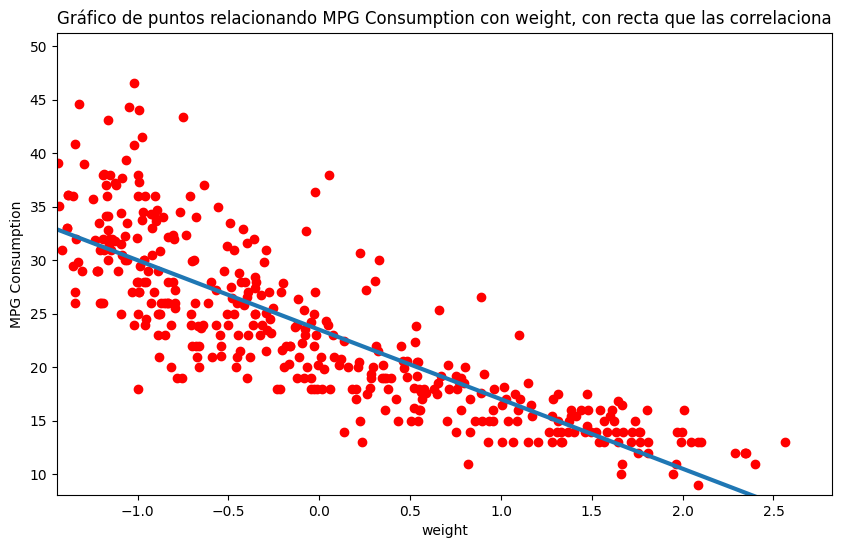

In [48]:
pesos = w_resultado.reshape(2,)

# Desempaquetamos los parámetros
punto_corte_est = pesos[0]
pendiente_est = pesos[1]

# Calculamos el punto inicial de la recta a la izquierda
x_ini = min(X_gd)[0] * 0.9
y_ini = punto_corte_est + pendiente_est * x_ini

# Definimos las coordenadas de la recta
x_plot = np.array([x_ini, -punto_corte_est / pendiente_est])
y_plot = np.array([y_ini, 0])

# Pintamos los puntos y la recta
plt.figure(figsize=(10, 6))
plt.scatter(X_gd, y, color = 'r')
plt.xlabel('weight')
plt.ylabel('MPG Consumption')
plt.title(f"Gráfico de puntos relacionando MPG Consumption con weight, con recta que las correlaciona")
plt.plot(x_plot, y_plot, lw = 3)
plt.xlim(min(X_gd)*0.9, max(X_gd)*1.1)
plt.ylim(min(y)*0.9, max(y)*1.1)
plt.show()

## 3. Modelización Cuadrática del peso y el consumo de coches

*Ya vimos que podría haber una mejora del modelo lineal entre el peso de los coches y su consumo si considerásemos una parábola en vez de una recta. Ello lo podemos llevar a cabo considerando una columna con el cuadrado de los pesos, que ya definimos dentro del DF X_completo.*

In [49]:
X_completo.columns

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'MPG', 'weight_2'],
      dtype='object')

*Comenzamos quedándonos con las dos columnas que nos interesan: weight y weight_2, que representan el peso y el peso al cuadrado. También las transformamos en arrays de numpy.*

In [50]:
X_new = X_completo[['weight', 'weight_2']]

X_new = X_new.to_numpy()
X_new = X_new.reshape(X_new.shape[0], 2)

y = auto_mpg.data.targets

y = y.to_numpy()

### 3.1 Regresión Lineal con mínimos cuadrados

*Nos centramos incialmente en la regresión lineal y para ello calculamos los pesos con la función pesos_ols. Nos da un coeficiente del peso al cuadrado positivo.*

In [51]:
pesos_ols(X_new, y)

array([[ 62.51665222],
       [-18.64232429],
       [  1.71652679]])

*Almacenamos los coeficientes en una variable, para luego estimar el mpg de forma más cómoda.*

In [52]:
pesos_est = pesos_ols(X_new, y)

*Chequeamos con SKlearn que nuestros coeficientes son correctos, y lo son.*

In [53]:
lr.fit(X_new, y)
print("Punto de corte:", lr.intercept_)
print("Coeficientes:", lr.coef_)

Punto de corte: [62.51665222]
Coeficientes: [[-18.64232429   1.71652679]]


*Calculamos la estimación de los mpg con el modelo llamemosle cuadrático, y comprobamos que la dimensión del resultado es la correcta.*

In [54]:
y_est = pesos_est[0] + pesos_est[1] * X_new[:, 0] + pesos_est[2] * X_new[:, 1]

In [55]:
y_est.shape

(398,)

*Ahora podemos pintar lo que hemos obtenido. En el cuadro siguiente mostramos los datos en rojo, la recta obtenida con el modelo lineal en azul, y la parábola que acabamos de determinar en verde. Lo cierto es que no hay una gran variación entre una y otra.*

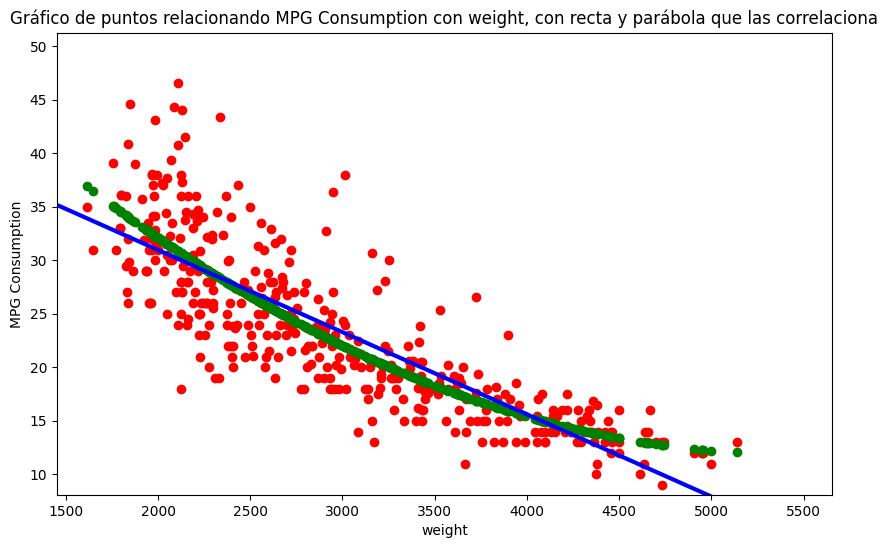

In [57]:
X = auto_mpg.data.features['weight']
y = auto_mpg.data.targets

X = X.to_numpy()
X = X.reshape(X.shape[0], 1)

y = y.to_numpy()

# Volvemos a calcular la recta del modelo lineal
pesos = pesos_ols(X, y).reshape(2,)

punto_corte = pesos[0]
pendiente = pesos[1]

x_plot = np.array([0, -punto_corte / pendiente])
y_plot = np.array([punto_corte, 0])

# Pintamos la figura
plt.figure(figsize=(10, 6))
# Pintamos los puntos
plt.scatter(X, y, color = 'r')
# Pintamos la recta
plt.plot(x_plot, y_plot, lw = 3, color = 'b')
plt.xlabel('weight')
plt.ylabel('MPG Consumption')
plt.title(f"Gráfico de puntos relacionando MPG Consumption con weight, con recta y parábola que las correlaciona")
# Pintamos la parábola
plt.scatter(X, y_est, color = 'g')

plt.xlim(min(X)*0.9, max(X)*1.1)
plt.ylim(min(y)*0.9, max(y)*1.1)
plt.show()

*Podemos estimar lo mucho o poco que hemos mejorado el modelo al introducir una columna con el cuadrado del peso. Para ello introducimos en el DF X_completo una columna con la estimación del mpg que hemos obtenido, que llamamos 'MPG_est'*

In [58]:
X_completo['MPG_est'] = y_est

In [59]:
X_completo.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,MPG,weight_2,MPG_est
0,307.0,8,130.0,3.504,12.0,70,1,18.0,12.278016,18.269491
1,350.0,8,165.0,3.693,11.5,70,1,15.0,13.638249,17.080968
2,318.0,8,150.0,3.436,11.0,70,1,18.0,11.806096,18.727106
3,304.0,8,150.0,3.433,12.0,70,1,16.0,11.785489,18.747660
4,302.0,8,140.0,3.449,10.5,70,1,17.0,11.895601,18.638394


*Calculamos la matriz de correlaciones. Lo cierto es que hay una correlación entre MPG_est y MPG del 0,85, algo superior que en el caso del modelo lineal, que es del 0,83, por lo que hay una ligera mejora, pero nada espectacular; con todo, la correlación era ya muy alta.*

In [60]:
correlation_matrix = X_completo.corr()
print(correlation_matrix)

              displacement  cylinders  horsepower    weight  acceleration  \
displacement      1.000000   0.950721    0.897257  0.932824     -0.543684   
cylinders         0.950721   1.000000    0.842983  0.896017     -0.505419   
horsepower        0.897257   0.842983    1.000000  0.864538     -0.689196   
weight            0.932824   0.896017    0.864538  1.000000     -0.417457   
acceleration     -0.543684  -0.505419   -0.689196 -0.417457      1.000000   
model_year       -0.370164  -0.348746   -0.416361 -0.306564      0.288137   
origin           -0.609409  -0.562543   -0.455171 -0.581024      0.205873   
MPG              -0.804203  -0.775396   -0.778427 -0.831741      0.420289   
weight_2          0.928907   0.889918    0.869720  0.991953     -0.427367   
MPG_est          -0.912613  -0.879912   -0.833415 -0.983783      0.391889   

              model_year    origin       MPG  weight_2   MPG_est  
displacement   -0.370164 -0.609409 -0.804203  0.928907 -0.912613  
cylinders      -0.

### 3.2 Descenso de Gradiente

*Estimamos ahora el descenso de gradiente para el caso del modelo cuadrático. Tenemos que estandarizar las dos filas, aunque para ello es mejor utilizar la librería de SKlearn StandardScaler.*

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
X_new = X_completo[['weight', 'weight_2']]
X_new = X_new.to_numpy()

scaler = StandardScaler()
scaler.fit(X_new)
X_new_sc = scaler.transform(X_new).reshape(X_new.shape[0], 2)



*Tomamos como referencia los coeficientes que determina SKlearn.*

In [63]:
lr.fit(X_new_sc, y)
print("Punto de corte:", lr.intercept_)
print("Coeficientes:", lr.coef_)

Punto de corte: [23.51457286]
Coeficientes: [[-15.76725346   9.3497882 ]]


*Ahora tomamos los datos inciales, que para ponerselo un poco más complicado al modelo consideramos los w1 y w2 con signos distintos a la solución, y ejecutamos el modelo. Hemos considerado un número mayor de iteraciones, unas 5.000. Finalmente el resultado es el correcto.*

*Con todo, el modelo es bastante sensible al parámetro eta: uno muy bajo, como 0,0005 no consigue converger rápidamente, y uno demasiado alto, como 0,005 acaba siendo inestable.*

In [64]:
w_inicial = np.array([40.0, 20.0, -10.0], dtype = float).reshape(3, 1)
iteraciones = 5000
eta = 0.0015
tol = 1e-12

In [65]:
descenso_gradiente_ndim(w_inicial, X_new_sc, y, iteraciones, eta, tol)

(array([[ 23.51457275],
        [-15.76724553],
        [  9.34978033]]),
 5000,
 7.631586652633801e-08,
 29.81542479412054)

In [66]:
w_resultado_ndim, iter, _, _ = descenso_gradiente_ndim(w_inicial, X_new_sc, y, iteraciones, eta, tol)

print(f'Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de {w_resultado_ndim.flatten().tolist()} tras {iter} iteraciones')

Se ha obtenido una estimación de los coeficientes w0, w1, ..., wn de [23.514572754138655, -15.767245531215968, 9.34978032910548] tras 5000 iteraciones


# *Fin de la práctica*

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta):
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0

    # TODO 1 Añade la columna de 1s


    # TODO 2 Haz un bucle para las iteraciones
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas


    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01
iteraciones = 2000

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
